In [11]:
library(tidyverse)
library(palmerpenguins)
library(Rtsne)
set.seed(142) # for reproducibility


## example with iris set
https://ajitjohnson.com/tsne-for-biologist-tutorial/

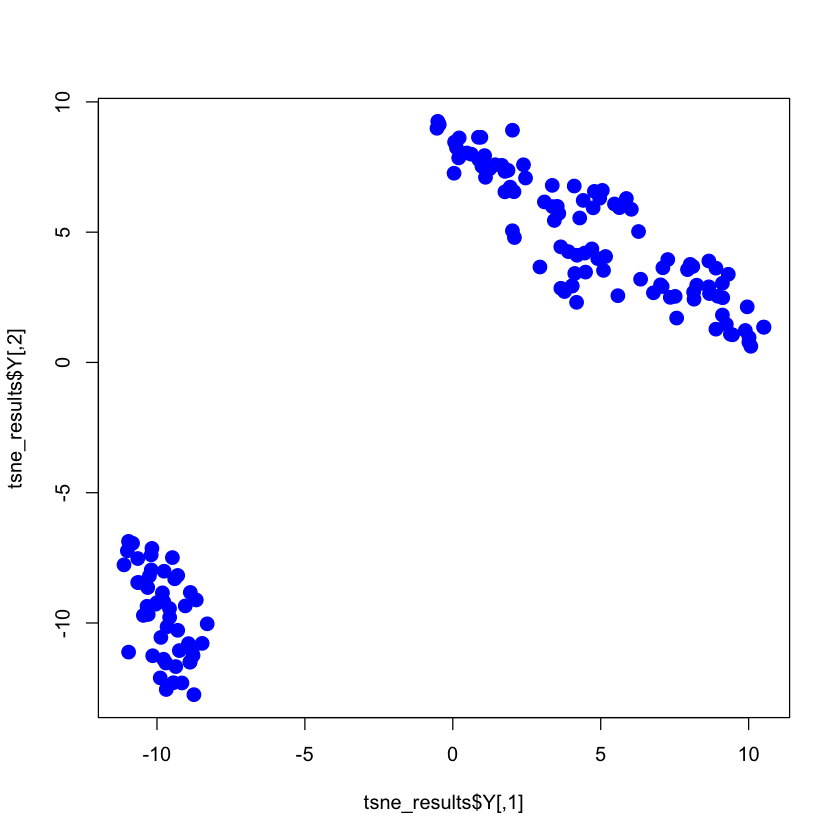

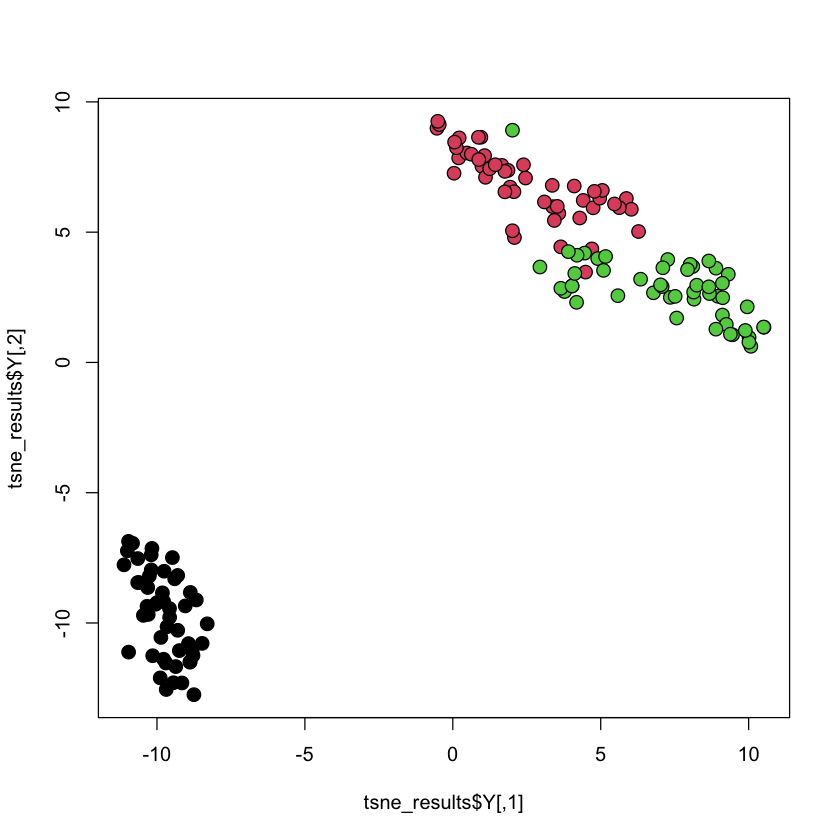

In [12]:
## Load dataset
IR <- iris # Loading the iris dataset into a object called IR

## Split IR into two objects: 1) containing measurements 2) containing species type
IR_data <- IR[ ,1:4] # We are sub-setting IR object such as to include 'all rows' and columns 1 to 4.
IR_species <- IR[ ,5] # We are sub-setting IR object such as to include 'all rows' and column 5.

## Load the t-SNE library
library(Rtsne)

## Run the t-SNE algorithm and store the results into an object called tsne_results
tsne_results <- Rtsne(IR_data, perplexity=30, check_duplicates = FALSE) # You can change the value of perplexity and see how the plot changes

## Generate the t_SNE plot
plot(tsne_results$Y, col = "blue", pch = 19, cex = 1.5) # Plotting the first image
plot(tsne_results$Y, col = "black", bg= IR_species, pch = 21, cex = 1.5) # Second plot: Color the plot by the real species type (bg= IR_species)


2 clouds first
then note the two similar but separate species in the larger cloud.

## example with palmer penguins set
https://datavizpyr.com/how-to-make-tsne-plot-in-r/

In [15]:
# Load the dataset
penguins <- penguins %>% 
  drop_na() %>% # remove null values
  #select(-year)%>%
  mutate(ID=row_number()) # Assign a row number to keep track of each penguin
head(penguins)
#unique(penguins['year'])

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,ID
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,1
Adelie,Torgersen,39.5,17.4,186,3800,female,2
Adelie,Torgersen,40.3,18.0,195,3250,female,3
Adelie,Torgersen,36.7,19.3,193,3450,female,4
Adelie,Torgersen,39.3,20.6,190,3650,male,5
Adelie,Torgersen,38.9,17.8,181,3625,female,6


In [16]:
#getting the two data objects - descriptive
penguins_meta <- penguins %>%
  select(ID,species,island,sex)     # All of the data that is not numerical, used as legend later
head(penguins_meta) 

ID,species,island,sex
<int>,<fct>,<fct>,<fct>
1,Adelie,Torgersen,male
2,Adelie,Torgersen,female
3,Adelie,Torgersen,female
4,Adelie,Torgersen,female
5,Adelie,Torgersen,male
6,Adelie,Torgersen,female


In [17]:
#getting the two data objects - quantitative and running TSNE on them
tSNE_fit <- penguins %>%
  # All numeric columns only, will help make model. categorical columns are legend
  select(where(is.numeric)) %>%
  # Not sure what this does either
  column_to_rownames("ID") %>%
  # scale the data
  scale() %>% 
  #run tSNE
  Rtsne()
ls(tSNE_fit)

[1] "costs"               "eta"                 "exaggeration_factor"
 [4] "final_momentum"      "itercosts"           "max_iter"           
 [7] "mom_switch_iter"     "momentum"            "N"                  
[10] "origD"               "perplexity"          "stop_lying_iter"    
[13] "theta"               "Y"

In [18]:
# from the tSNE call, we need $Y for the visualization. Here, we name the columns of Y for ease.
tSNE_df <- tSNE_fit$Y %>% 
  as.data.frame() %>%
  rename(tSNE1="V1",
         tSNE2="V2") %>%
  mutate(ID=row_number()) # sets each value pair to the proper row ID(ie. penguin)
head(tSNE_df)

,tSNE1,tSNE2,ID
,<dbl>,<dbl>,<int>
1,-7.564397,-10.122466,1
2,-9.422740,-8.154526,2
3,-10.745006,-5.976587,3
4,-4.363223,-5.562403,4
5,-1.316687,-7.177846,5
6,-9.516435,-9.137344,6


In [7]:
# adding the column id helps us join the tSNE data with the categorical values we had
# identified in the metadata
tSNE_df <- tSNE_df %>%
  inner_join(penguins_meta, by="ID")
head(tSNE_df)
# from here, we visualize using ggplot.

,tSNE1,tSNE2,ID,species,island,sex
,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
1,-7.564397,-10.122466,1,Adelie,Torgersen,male
2,-9.422740,-8.154526,2,Adelie,Torgersen,female
3,-10.745006,-5.976587,3,Adelie,Torgersen,female
4,-4.363223,-5.562403,4,Adelie,Torgersen,female
5,-1.316687,-7.177846,5,Adelie,Torgersen,male
6,-9.516435,-9.137344,6,Adelie,Torgersen,female


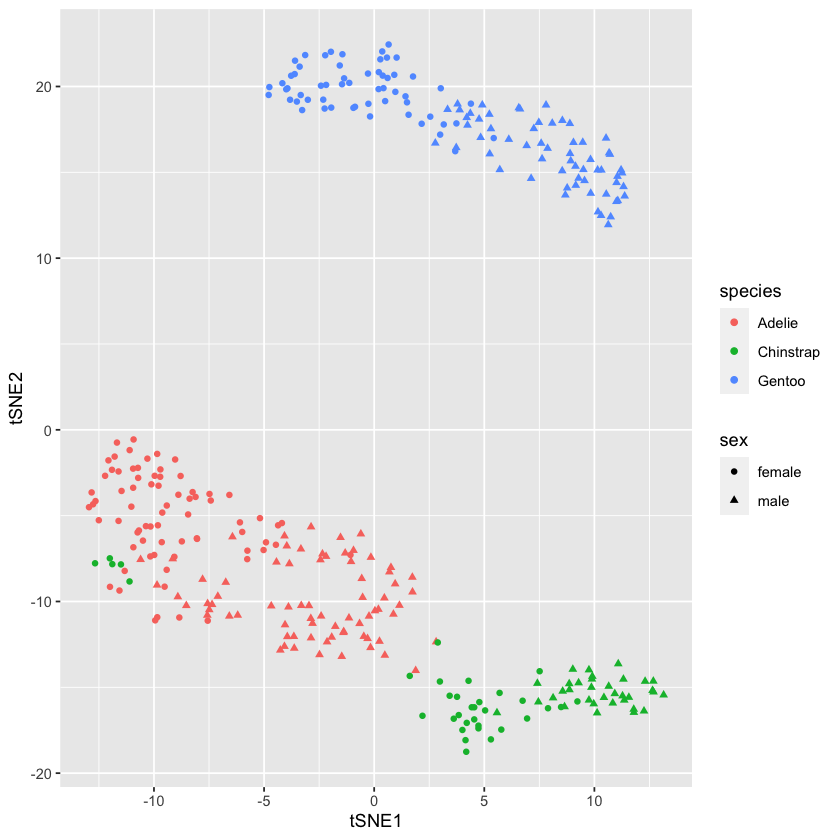

In [8]:
tSNE_df %>%
  ggplot(aes(x = tSNE1, 
             y = tSNE2,
             color = species,
             shape = sex))+
  geom_point()



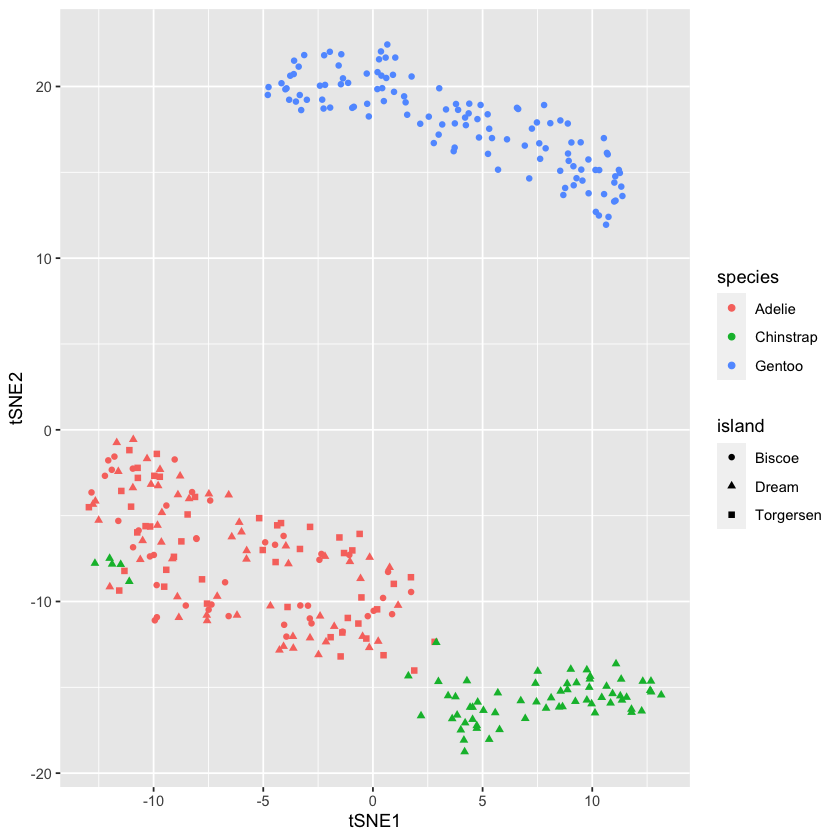

In [9]:
tSNE_df %>%
  ggplot(aes(x = tSNE1, 
             y = tSNE2,
             color = species,
             shape = island))+
  geom_point()